## Prepare data and libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tabulate import tabulate

In [3]:
jokes_i = 'information/jokes/jokes.csv'
squad_i = 'information/squad/squad.csv'
tatman_i = 'information/tatman/tatman.csv'

In [4]:
jokes_dsi = 'information/jokes/jokesdsi.csv'
squad_dsi = 'information/squad/squaddsi.csv'
tatman_dsi = 'information/tatman/tatmandsi.csv'

In [5]:
jokes_mad = 'information/jokes/jokesmad.csv'
squad_mad = 'information/squad/squadmad.csv'
tatman_mad = 'information/tatman/tatmanmad.csv'

In [6]:
jokes_cu = 'information/jokes/jokescu.csv'
squad_cu = 'information/squad/squadcu.csv'
tatman_cu = 'information/tatman/tatmancu.csv'

In [7]:
level_list = ["Knowledge", "Comprehension", "Application", "Analysis", "Synthesis", "Evaluation"]

In [8]:
jokes = [jokes_i, jokes_dsi, jokes_mad, jokes_cu]
squad = [squad_i, squad_dsi, squad_mad, squad_cu]
tatman = [tatman_i, tatman_dsi, tatman_mad, tatman_cu]

In [9]:
jokes_name = "Question-Answer Jokes"
tatman_name = "R. Tatman's Question-Answer Dataset"
squad_name = "Stanford Question Answering Dataset"

In [10]:
def sim_to_dist(sim):
    return np.sqrt(2*(1-sim))

# originally, information was computed as cosine similarity; ultimately it is converted to cosine distance

In [11]:
def compile_ds(path0, path1, path2, path3):
    file0 = pd.read_csv(path0, sep=';', index_col=0)
    file1 = pd.read_csv(path1, sep=';', index_col=0)
    file2 = pd.read_csv(path2, sep=';', index_col=0)
    file3 = pd.read_csv(path3, sep=';', index_col=0)
    file0['inf_droberta'] = sim_to_dist(file0.inf_droberta)
    file0['inf_minilm'] = sim_to_dist(file0.inf_minilm)
    file0['inf_mpnet'] = sim_to_dist(file0.inf_mpnet)
    file0['DSI'] = file1.DSI
    file0['MAD'] = file2.MAD
    file0['CU'] = file3.CU2
    return file0

In [12]:
jokesds = compile_ds(*jokes)

C:\Users\kmarc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
tatmands = compile_ds(*tatman)

In [14]:
squadds = compile_ds(*squad)

# Metric value histograms

In [15]:
column_list_A = ['BT_Level', 'inf_droberta', 'inf_minilm', 'inf_mpnet', 'CU', 'DSI', 'MAD']
column_list_B = column_list_A[1:]

In [16]:
titles = ['information (all-distilroberta-v1)',
          'information (all-MiniLM-L12-v2)',
          'information (all-mpnet-base-v2)',
          'DSI', 'MAD', 'content uniqueness']

In [17]:
def analysis_hist(ds, title):
    small_ds = ds[column_list_B]
    for i in range(6):
        plt.figure(figsize=(7, 2))
        small_ds[column_list_B[i]].hist(bins=25)
        plt.title(title+': '+titles[i])
        plt.xlabel(titles[i])
        plt.show()

## R. Tatman's Question-Answer Dataset

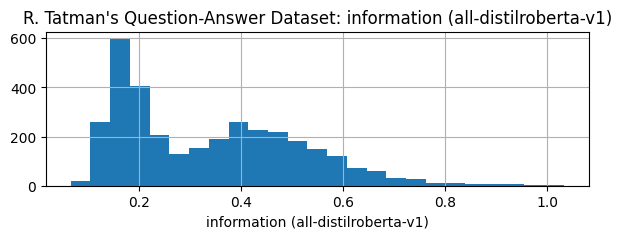

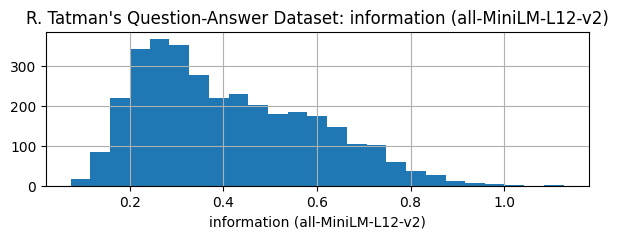

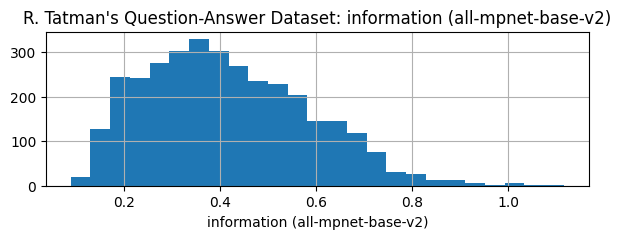

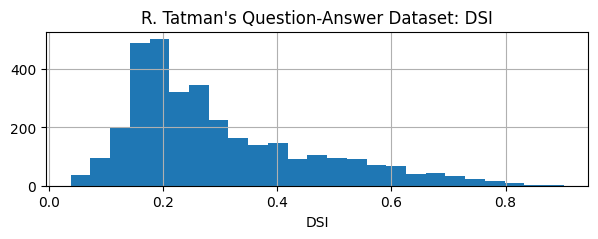

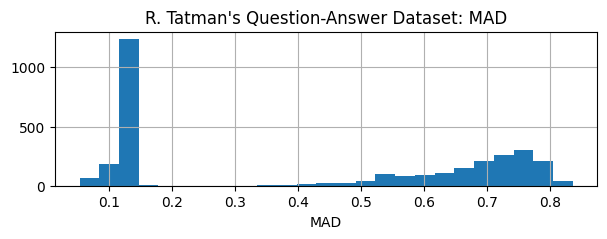

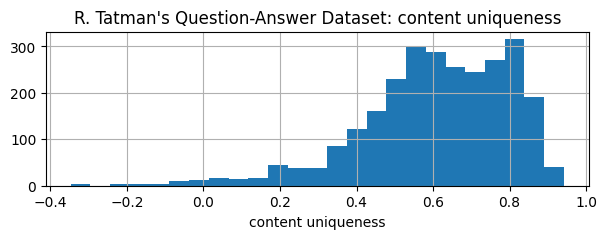

In [18]:
analysis_hist(tatmands, tatman_name)

## Question-Answer Jokes

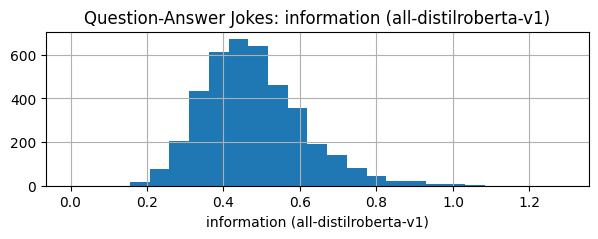

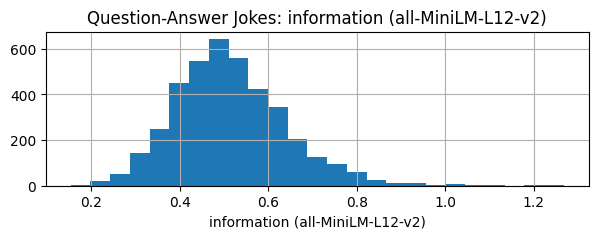

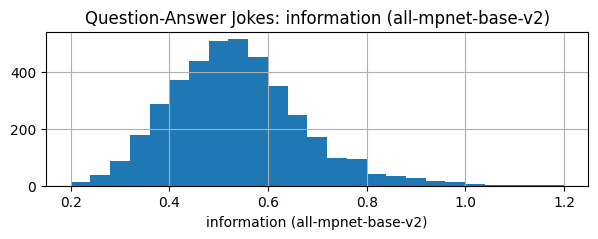

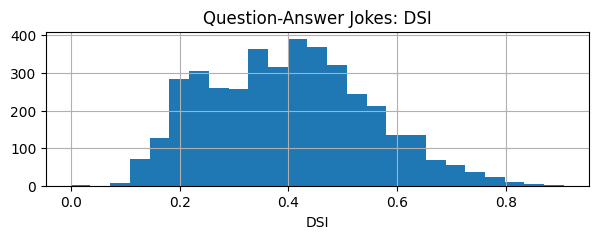

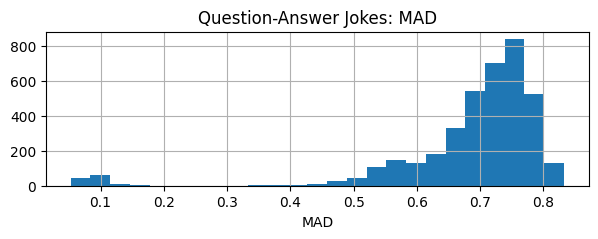

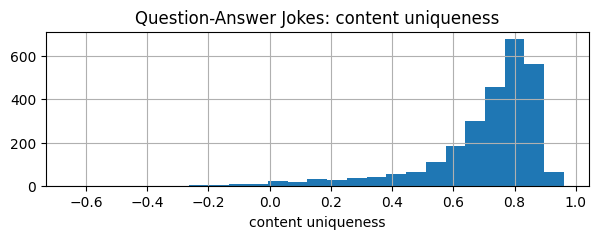

In [19]:
analysis_hist(jokesds, jokes_name)

## Stanford Question Answering Dataset

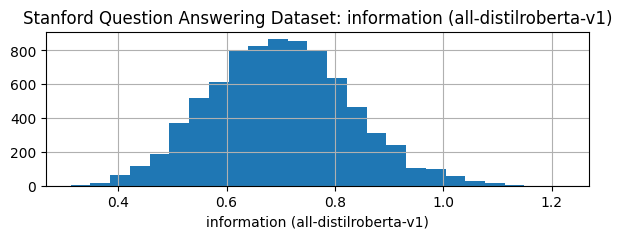

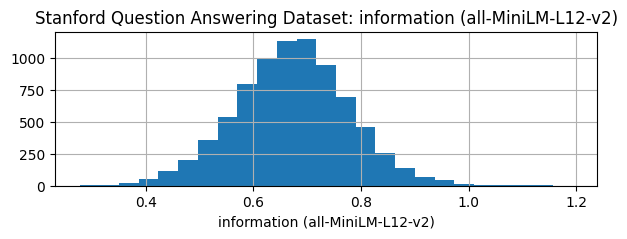

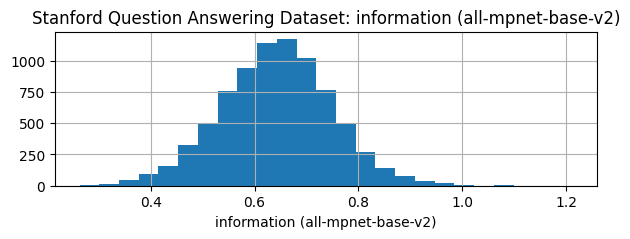

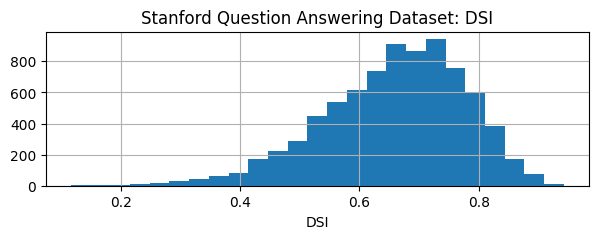

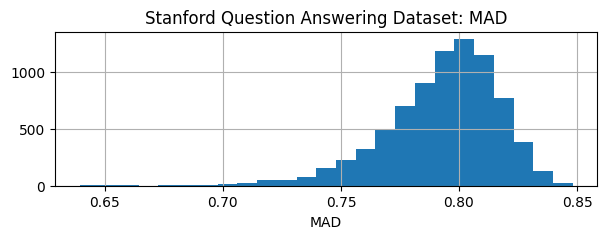

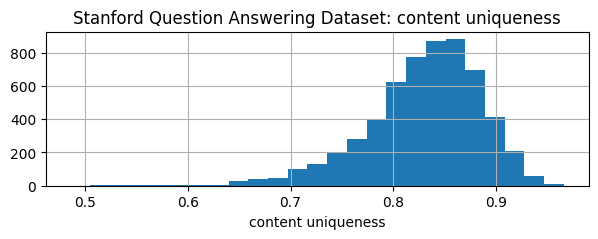

In [20]:
analysis_hist(squadds, squad_name)

## all together

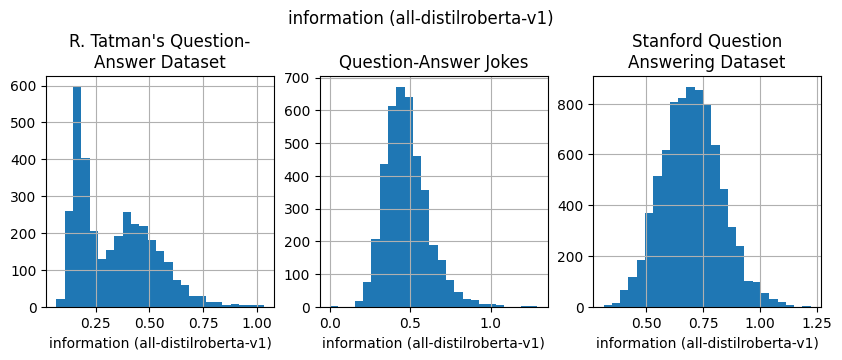

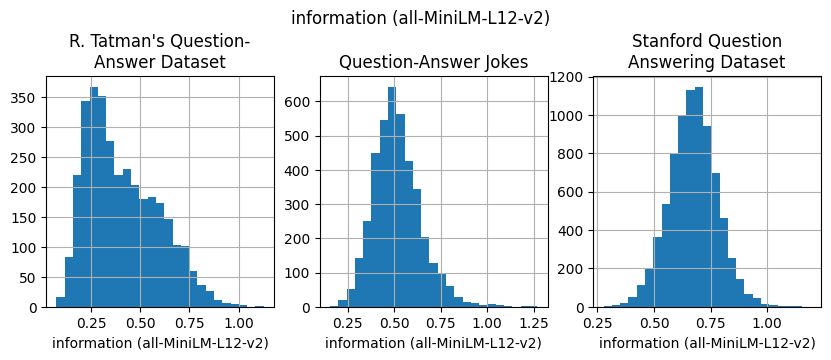

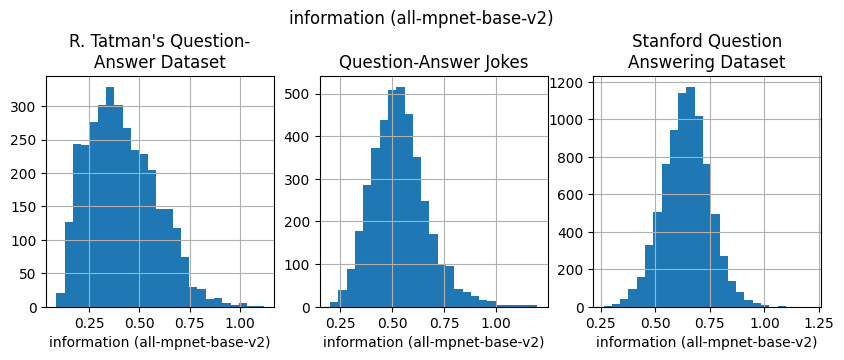

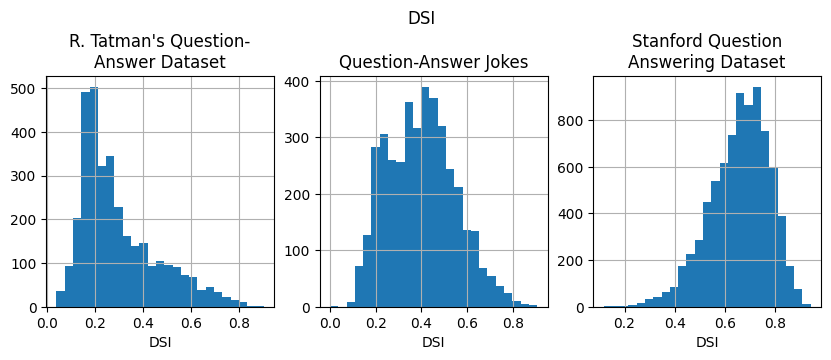

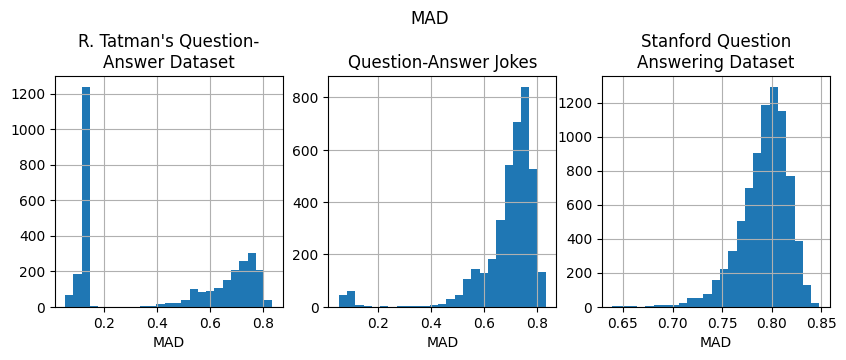

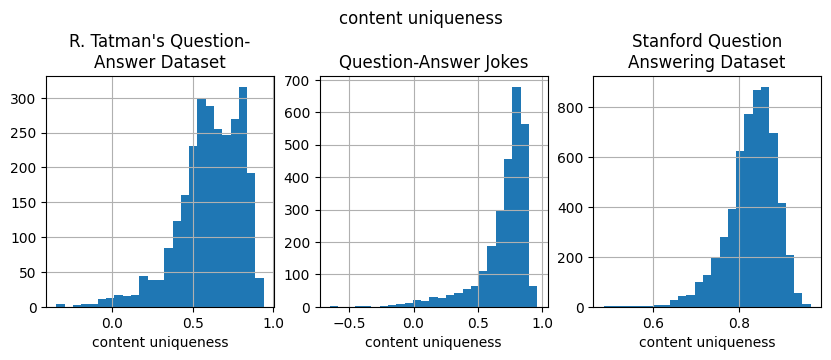

In [30]:
def analysis_hist_stacked():
    ds_titles = ["R. Tatman's Question-\nAnswer Dataset", "Question-Answer Jokes", "Stanford Question\nAnswering Dataset"]
    small_tatman = tatmands[column_list_B]
    small_jokes = jokesds[column_list_B]
    small_squad = squadds[column_list_B]
    for i in range(6):
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))
        small_tatman[column_list_B[i]].hist(bins=25, ax=axs[0])
        small_jokes[column_list_B[i]].hist(bins=25, ax=axs[1])
        small_squad[column_list_B[i]].hist(bins=25, ax=axs[2])
        for axi in range(3):
            axs[axi].set_title(ds_titles[axi])
            axs[axi].set_xlabel(titles[i])
        fig.suptitle(titles[i], y=1.1)
        plt.show()

analysis_hist_stacked()

# Value analysis tables

In [31]:
def combine(ds_levels, ds_overall):
    level_order = ["overall", "Knowledge", "Comprehension", "Application", "Analysis", "Synthesis", "Evaluation"]
    overall_row = ds_overall.to_frame().T
    stacked = pd.concat([overall_row, ds_levels])
    stacked.loc['overall'] = stacked.loc[0]
    return stacked.drop([0]).loc[level_order]

In [32]:
def value_stats(ds):    
    small_ds = ds[column_list_A]
    grouped = small_ds.groupby('BT_Level')
    smaller_ds = small_ds[column_list_B]
    means = combine(grouped.mean(), smaller_ds.mean())
    varis = combine(grouped.std(), smaller_ds.std())
    mins = combine(grouped.min(), smaller_ds.min())
    maxs = combine(grouped.max(), smaller_ds.max())
    return means, varis, mins, maxs

In [33]:
def meanvar(ds):
    vs = value_stats(ds)
    meanvar = vs[0]
    justvar = vs[1]
    for column in meanvar.columns:
        meanvar[column] = meanvar[column].map('{:,.3g}'.format) + " ± " + justvar[column].map('{:,.3g}'.format)
    return meanvar

In [34]:
def minmax(ds):
    vs = value_stats(ds)
    minmax = vs[2]
    justmax = vs[3]
    for column in minmax.columns:
        minmax[column] = minmax[column].map('{:,.3g}'.format) + " ÷ " + justmax[column].map('{:,.3g}'.format)
    return minmax

In [35]:
def latex_table(ds):
    print(tabulate(ds, ds.columns, tablefmt='latex', showindex=False))

## R. Tatman's Question-Answer Dataset

In [36]:
latex_table(meanvar(tatmands))

\begin{tabular}{llllll}
\hline
 inf\_droberta   & inf\_minilm    & inf\_mpnet     & CU            & DSI           & MAD           \\
\hline
 0.339 ± 0.175  & 0.41 ± 0.181  & 0.415 ± 0.168 & 0.294 ± 0.161 & 0.414 ± 0.291 & 0.607 ± 0.198 \\
 0.371 ± 0.175  & 0.445 ± 0.184 & 0.445 ± 0.167 & 0.315 ± 0.163 & 0.445 ± 0.287 & 0.603 ± 0.213 \\
 0.254 ± 0.132  & 0.319 ± 0.133 & 0.327 ± 0.139 & 0.244 ± 0.14  & 0.342 ± 0.29  & 0.626 ± 0.156 \\
 0.286 ± 0.154  & 0.366 ± 0.158 & 0.385 ± 0.154 & 0.263 ± 0.142 & 0.368 ± 0.293 & 0.593 ± 0.175 \\
 0.301 ± 0.168  & 0.369 ± 0.175 & 0.376 ± 0.166 & 0.283 ± 0.171 & 0.396 ± 0.3   & 0.621 ± 0.164 \\
 0.263 ± 0.145  & 0.328 ± 0.141 & 0.351 ± 0.137 & 0.239 ± 0.14  & 0.312 ± 0.273 & 0.615 ± 0.159 \\
 0.288 ± 0.174  & 0.34 ± 0.167  & 0.353 ± 0.164 & 0.25 ± 0.158  & 0.351 ± 0.288 & 0.619 ± 0.176 \\
\hline
\end{tabular}


In [37]:
latex_table(minmax(tatmands))

\begin{tabular}{llllll}
\hline
 inf\_droberta   & inf\_minilm     & inf\_mpnet     & CU             & DSI            & MAD             \\
\hline
 0.0672 ÷ 1.03  & 0.074 ÷ 1.13   & 0.089 ÷ 1.12  & 0.0385 ÷ 0.902 & 0.0526 ÷ 0.836 & -0.347 ÷ 0.942  \\
 0.0936 ÷ 1.03  & 0.105 ÷ 1.13   & 0.106 ÷ 1.12  & 0.0513 ÷ 0.902 & 0.0526 ÷ 0.823 & -0.347 ÷ 0.94   \\
 0.0886 ÷ 0.646 & 0.111 ÷ 0.859  & 0.108 ÷ 0.904 & 0.0435 ÷ 0.788 & 0.0696 ÷ 0.809 & 0.152 ÷ 0.892   \\
 0.0895 ÷ 0.767 & 0.101 ÷ 0.879  & 0.089 ÷ 0.8   & 0.05 ÷ 0.815   & 0.0713 ÷ 0.818 & -0.0551 ÷ 0.904 \\
 0.0918 ÷ 0.89  & 0.0917 ÷ 0.929 & 0.098 ÷ 0.929 & 0.0444 ÷ 0.812 & 0.0666 ÷ 0.824 & -0.0174 ÷ 0.927 \\
 0.0672 ÷ 0.755 & 0.107 ÷ 0.782  & 0.119 ÷ 0.76  & 0.0385 ÷ 0.829 & 0.0721 ÷ 0.836 & 0.0698 ÷ 0.903  \\
 0.0874 ÷ 0.934 & 0.074 ÷ 0.92   & 0.119 ÷ 1.01  & 0.0476 ÷ 0.866 & 0.0666 ÷ 0.815 & -0.317 ÷ 0.942  \\
\hline
\end{tabular}


## Question-Answer Jokes

In [38]:
latex_table(meanvar(jokesds))

\begin{tabular}{llllll}
\hline
 inf\_droberta   & inf\_minilm    & inf\_mpnet     & CU            & DSI           & MAD           \\
\hline
 0.478 ± 0.133  & 0.516 ± 0.128 & 0.535 ± 0.135 & 0.4 ± 0.148   & 0.686 ± 0.13  & 0.705 ± 0.193 \\
 0.48 ± 0.139   & 0.526 ± 0.133 & 0.54 ± 0.136  & 0.408 ± 0.154 & 0.676 ± 0.137 & 0.686 ± 0.197 \\
 0.464 ± 0.13   & 0.509 ± 0.126 & 0.529 ± 0.132 & 0.372 ± 0.154 & 0.686 ± 0.111 & 0.68 ± 0.206  \\
 0.463 ± 0.123  & 0.491 ± 0.111 & 0.509 ± 0.125 & 0.404 ± 0.148 & 0.702 ± 0.121 & 0.714 ± 0.185 \\
 0.463 ± 0.117  & 0.503 ± 0.117 & 0.527 ± 0.127 & 0.371 ± 0.139 & 0.689 ± 0.127 & 0.701 ± 0.198 \\
 0.477 ± 0.138  & 0.506 ± 0.129 & 0.533 ± 0.141 & 0.378 ± 0.138 & 0.688 ± 0.125 & 0.73 ± 0.189  \\
 0.501 ± 0.139  & 0.525 ± 0.136 & 0.546 ± 0.143 & 0.434 ± 0.142 & 0.698 ± 0.122 & 0.732 ± 0.174 \\
\hline
\end{tabular}


In [39]:
latex_table(minmax(jokesds))

\begin{tabular}{llllll}
\hline
 inf\_droberta    & inf\_minilm    & inf\_mpnet     & CU             & DSI            & MAD             \\
\hline
 0.000632 ÷ 1.29 & 0.153 ÷ 1.27  & 0.2 ÷ 1.2     & 0 ÷ 0.906      & 0.0529 ÷ 0.832 & -0.65 ÷ 0.961   \\
 0.000632 ÷ 1.29 & 0.153 ÷ 1.27  & 0.201 ÷ 1.19  & 0 ÷ 0.906      & 0.0613 ÷ 0.832 & -0.16 ÷ 0.942   \\
 0.202 ÷ 0.944   & 0.226 ÷ 0.804 & 0.254 ÷ 0.881 & 0.105 ÷ 0.757  & 0.0529 ÷ 0.819 & -0.0361 ÷ 0.947 \\
 0.202 ÷ 0.923   & 0.229 ÷ 0.819 & 0.225 ÷ 0.94  & 0.105 ÷ 0.838  & 0.0601 ÷ 0.826 & -0.239 ÷ 0.908  \\
 0.181 ÷ 1.02    & 0.195 ÷ 1.07  & 0.2 ÷ 1.06    & 0.1 ÷ 0.827    & 0.067 ÷ 0.828  & -0.394 ÷ 0.936  \\
 0.206 ÷ 1.02    & 0.221 ÷ 1.11  & 0.223 ÷ 1.13  & 0.0833 ÷ 0.773 & 0.0682 ÷ 0.824 & -0.201 ÷ 0.934  \\
 0.195 ÷ 1.08    & 0.181 ÷ 1.11  & 0.233 ÷ 1.2   & 0.114 ÷ 0.829  & 0.0638 ÷ 0.825 & -0.65 ÷ 0.961   \\
\hline
\end{tabular}


## Stanford Question Answering Dataset

In [40]:
latex_table(meanvar(squadds))

\begin{tabular}{llllll}
\hline
 inf\_droberta   & inf\_minilm    & inf\_mpnet      & CU            & DSI            & MAD            \\
\hline
 0.699 ± 0.129  & 0.672 ± 0.106 & 0.642 ± 0.107  & 0.658 ± 0.119 & 0.793 ± 0.0243 & 0.83 ± 0.0564  \\
 0.714 ± 0.126  & 0.688 ± 0.101 & 0.655 ± 0.101  & 0.671 ± 0.116 & 0.792 ± 0.0244 & 0.827 ± 0.0578 \\
 0.652 ± 0.13   & 0.633 ± 0.106 & 0.586 ± 0.0999 & 0.623 ± 0.134 & 0.796 ± 0.0212 & 0.821 ± 0.0542 \\
 0.669 ± 0.116  & 0.649 ± 0.104 & 0.627 ± 0.105  & 0.632 ± 0.112 & 0.793 ± 0.0248 & 0.831 ± 0.0536 \\
 0.658 ± 0.138  & 0.643 ± 0.113 & 0.618 ± 0.116  & 0.631 ± 0.125 & 0.791 ± 0.0249 & 0.836 ± 0.0473 \\
 0.68 ± 0.133   & 0.645 ± 0.11  & 0.617 ± 0.111  & 0.636 ± 0.122 & 0.793 ± 0.025  & 0.834 ± 0.0554 \\
 0.672 ± 0.125  & 0.639 ± 0.109 & 0.615 ± 0.116  & 0.636 ± 0.119 & 0.795 ± 0.0233 & 0.838 ± 0.0541 \\
\hline
\end{tabular}


In [41]:
latex_table(minmax(squadds))

\begin{tabular}{llllll}
\hline
 inf\_droberta   & inf\_minilm    & inf\_mpnet     & CU            & DSI           & MAD           \\
\hline
 0.313 ÷ 1.22   & 0.277 ÷ 1.19  & 0.263 ÷ 1.21  & 0.116 ÷ 0.943 & 0.639 ÷ 0.848 & 0.486 ÷ 0.966 \\
 0.325 ÷ 1.15   & 0.291 ÷ 1.12  & 0.263 ÷ 1.07  & 0.148 ÷ 0.943 & 0.639 ÷ 0.848 & 0.486 ÷ 0.966 \\
 0.347 ÷ 1.04   & 0.363 ÷ 0.947 & 0.331 ÷ 0.851 & 0.158 ÷ 0.909 & 0.715 ÷ 0.84  & 0.646 ÷ 0.951 \\
 0.403 ÷ 1.22   & 0.368 ÷ 1.12  & 0.331 ÷ 1.14  & 0.25 ÷ 0.862  & 0.653 ÷ 0.837 & 0.673 ÷ 0.938 \\
 0.321 ÷ 1.15   & 0.324 ÷ 1.19  & 0.263 ÷ 1.21  & 0.116 ÷ 0.917 & 0.686 ÷ 0.848 & 0.654 ÷ 0.935 \\
 0.357 ÷ 1.09   & 0.364 ÷ 1     & 0.327 ÷ 1.09  & 0.211 ÷ 0.88  & 0.692 ÷ 0.845 & 0.594 ÷ 0.954 \\
 0.313 ÷ 1.11   & 0.277 ÷ 1.08  & 0.294 ÷ 1.01  & 0.16 ÷ 0.89   & 0.692 ÷ 0.845 & 0.511 ÷ 0.954 \\
\hline
\end{tabular}


# Heatmaps

In [42]:
def analysis_bt(ds, title):
    small_ds = ds[column_list_A]
    small_ds.BT_Level = pd.Categorical(small_ds.BT_Level, level_list)
    for i in range(5):
        sns.histplot(data=small_ds, x=column_list_A[i+1], y='BT_Level', hue='BT_Level', hue_order=level_list, legend=None)
        plt.title(title+': '+titles[i])
        plt.xlabel(titles[i])
        plt.show()

In [43]:
exp1_stats = ['CharacterNumber', 'WordNumber', 'CommonWordNumber', 'TTR', 'CTTR', 'DMetric', 'FRES', 'FKGL', 'ARI']

In [44]:
def correlations(ds):
    ds_stats = ds[exp1_stats + column_list_B]
    return ds_stats.corr().loc[exp1_stats, column_list_B]

<Axes: >

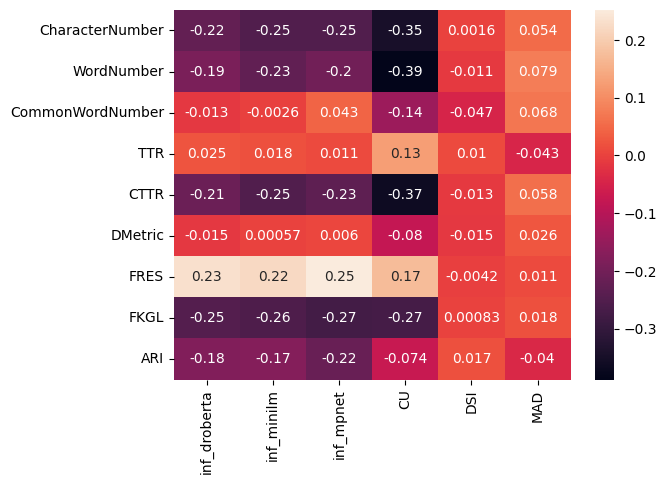

In [45]:
sns.heatmap(correlations(jokesds), annot=True)

<Axes: >

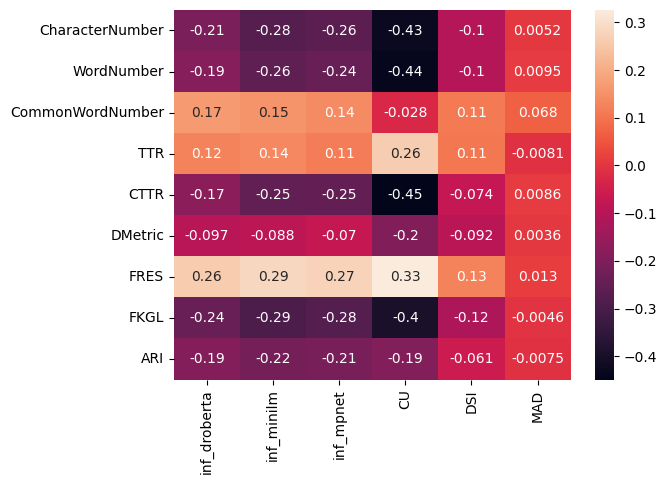

In [46]:
sns.heatmap(correlations(tatmands), annot=True)

<Axes: >

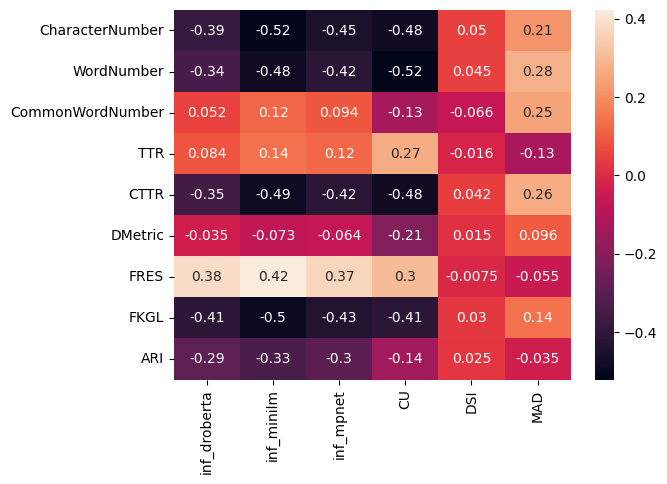

In [47]:
sns.heatmap(correlations(squadds), annot=True)

In [48]:
jokesds.to_csv('jokes_all.csv', sep=';')
tatmands.to_csv('tatman_all.csv', sep=';')
squadds.to_csv('squad_all.csv', sep=';')